In [55]:
import numpy as np 
import pandas as pd
# import pyspark
# import findspark

pd.set_option('display.max_columns', None)

In [177]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# importing data set
dataset = pd.read_csv('Dataset/Kaggle_Airbnb_Open_Data.csv')

/var/folders/ll/tr3z9w091y55mt3_qxw9k4gr0000gn/T/ipykernel_80615/2695541328.py:2: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('Dataset/Kaggle_Airbnb_Open_Data.csv')


In [62]:
# assigning dataset dataframe to 'df'
# in the price column remove $ and , then convert datatype to float

df = dataset.copy()# Create a copy of the original DataFrame

# Convert the 'price' column to strings
df['price'] = df['price'].astype(str)

df['price'] = df['price'].str.replace('$', '')
df['price'] = df['price'].str.replace(',', '')
df['price'] = df['price'].astype('float')

/var/folders/ll/tr3z9w091y55mt3_qxw9k4gr0000gn/T/ipykernel_80615/3163880160.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = df['price'].str.replace('$', '')


In [66]:
# Convert the 'price' column to strings
df['service fee'] = df['service fee'].astype(str)

df['service fee'] = df['service fee'].str.replace('$', '')
df['service fee'] = df['service fee'].str.replace(',', '')
df['service fee'] = df['service fee'].astype('float')

/var/folders/ll/tr3z9w091y55mt3_qxw9k4gr0000gn/T/ipykernel_80615/326364152.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['service fee'] = df['service fee'].str.replace('$', '')


In [67]:
df.shape

(102599, 26)

In [68]:
# df.columns
df.columns = df.columns.str.strip()
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [69]:
airbnb_df = df[['id', 'NAME', 'host id', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long','room type',
       'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365']]

In [70]:
airbnb_df.columns

Index(['id', 'NAME', 'host id', 'host name', 'neighbourhood group',
       'neighbourhood', 'lat', 'long', 'room type', 'price', 'service fee',
       'minimum nights', 'number of reviews', 'last review',
       'reviews per month', 'review rate number',
       'calculated host listings count', 'availability 365'],
      dtype='object')

In [71]:
# renaming a column
airbnb_df.rename(columns = {'neighbourhood group':'neighbourhood_group'}, inplace = True)

/var/folders/ll/tr3z9w091y55mt3_qxw9k4gr0000gn/T/ipykernel_80615/3860077253.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb_df.rename(columns = {'neighbourhood group':'neighbourhood_group'}, inplace = True)


In [72]:
#Number of AirBnb in different neighbourhood_group
neighbourhood_group_count = airbnb_df.groupby("neighbourhood_group").count()
neighbourhood_group_count

,id,NAME,host id,host name,neighbourhood,lat,long,room type,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
neighbourhood_group,,,,,,,,,,,,,,,,,
Bronx,2712,2704,2712,2704,2712,2712,2712,2712,2712,2706,2704,2712,2361,2361,2695,2704,2696
Brooklyn,41842,41734,41842,41678,41834,41839,41839,41842,41842,41724,41687,41772,35968,35973,41724,41705,41653
Manhattan,43792,43689,43792,43613,43784,43788,43788,43792,43792,43682,43599,43718,35989,35994,43648,43647,43626
Queens,13267,13239,13267,13218,13267,13266,13266,13267,13267,13232,13219,13228,11509,11511,13228,13240,13202
Staten Island,955,954,955,950,955,955,955,955,955,952,951,955,852,852,949,953,954
brookln,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
manhatan,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1


---

Neighbourhood group 

Get the total value of listing in each neighbourhood_group

Plot the values of the neighbourhood_group count - Bar chart , Pie chart

In [73]:
#Number of AirBnb in different neighbourhood_group
airbnb_df['neighbourhood_group'].value_counts()

Manhattan        43792
Brooklyn         41842
Queens           13267
Bronx             2712
Staten Island      955
brookln              1
manhatan             1
Name: neighbourhood_group, dtype: int64

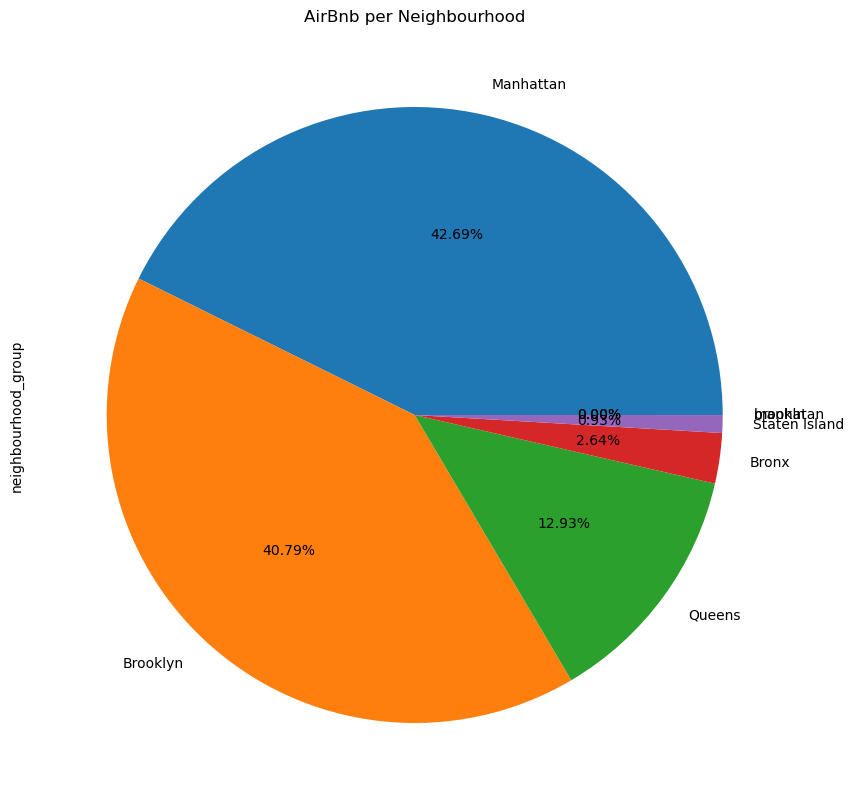

In [74]:
# ploting
#Pie chart of different neighbourhood_group by count
neighbourhood_groupcount = airbnb_df['neighbourhood_group'].value_counts()
plotPie = neighbourhood_groupcount.plot.pie(y='count',autopct='%1.2f%%',figsize = (20,10 ), title='AirBnb per Neighbourhood')

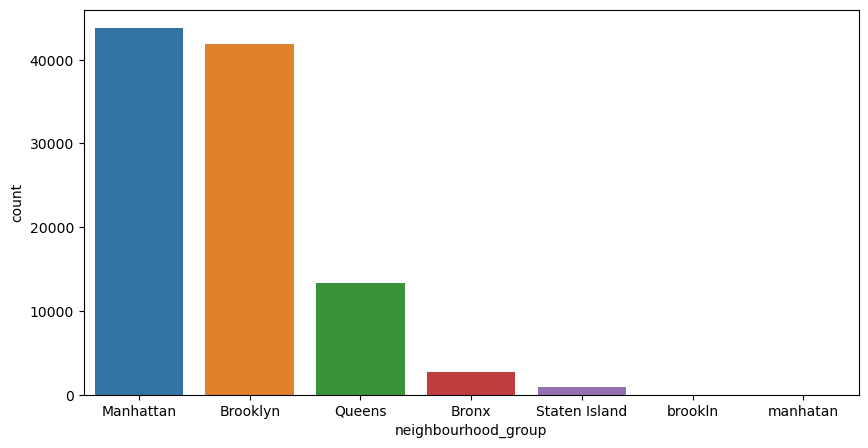

In [75]:
#Plot of different neighbourhood_group by count
neighbourhood_hist = airbnb_df['neighbourhood_group'].value_counts()

# create a DataFrame from the 'neighbourhood_hist' Series before plotting
neighbourhood_hist_df = pd.DataFrame({'neighbourhood_group': neighbourhood_hist.index, 'count': neighbourhood_hist.values})

plt.figure(figsize=(10, 5))
sns.barplot(x='neighbourhood_group', y='count', data=neighbourhood_hist_df)
plt.show()

---
Room Type 

Get the room type count

Plot the room type count as bar chart

In [76]:
# count on room types
airbnb_df['room type'].value_counts()


Entire home/apt    53701
Private room       46556
Shared room         2226
Hotel room           116
Name: room type, dtype: int64

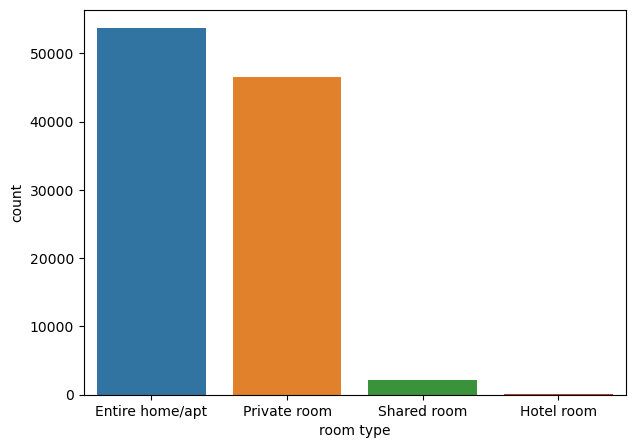

In [77]:
# Find the highest number of room types

room_type = airbnb_df['room type'].value_counts()
room_type_df = pd.DataFrame({'room type':room_type.index, 'count':room_type.values})

plt.figure(figsize=(7, 5))
sns.barplot(x='room type', y='count', data=room_type_df)
plt.show()

In [78]:
airbnb_df.describe()

,id,host id,lat,long,service fee,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,1.025990e+05,1.025990e+05,102591.000000,102591.000000,102326.000000,102190.000000,102416.000000,86720.000000,102273.000000,102280.000000,102151.000000
mean,2.914623e+07,4.925411e+10,40.728094,-73.949644,125.026924,8.135845,27.483743,1.374022,3.279106,7.936605,141.133254
std,1.625751e+07,2.853900e+10,0.055857,0.049521,66.325739,30.553781,49.508954,1.746621,1.284657,32.218780,135.435024
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,10.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,1.508581e+07,2.458333e+10,40.688740,-73.982580,68.000000,2.000000,1.000000,0.220000,2.000000,1.000000,3.000000
50%,2.913660e+07,4.911774e+10,40.722290,-73.954440,125.000000,3.000000,7.000000,0.740000,3.000000,1.000000,96.000000
75%,4.320120e+07,7.399650e+10,40.762760,-73.932350,183.000000,5.000000,30.000000,2.000000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,240.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


---
Find the AVG price of the neighbourhood_group

Find the AVG price of each room type in the neighbourhood_group

Plot the findings - Bart chart

In [80]:
# Group by 'neighbourhood_group' and calculate the mean price for each group

#  errors='coerce' parameter will convert non-numeric values to NaN , Convert 'price' column to numeric
airbnb_df['price'] = pd.to_numeric(airbnb_df['price'], errors='coerce') 
neighbourhood_group_avgPrice = airbnb_df.groupby('neighbourhood_group')['price'].mean().reset_index()

# Rename the 'price' column to 'avg_price'
neighbourhood_group_avgPrice = neighbourhood_group_avgPrice.rename(columns={"price": "avg_price"})
neighbourhood_group_avgPrice

/var/folders/ll/tr3z9w091y55mt3_qxw9k4gr0000gn/T/ipykernel_80615/4104657604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb_df['price'] = pd.to_numeric(airbnb_df['price'], errors='coerce')


,neighbourhood_group,avg_price
0,Bronx,627.766359
1,Brooklyn,626.562193
2,Manhattan,622.440227
3,Queens,630.207647
4,Staten Island,624.490546
5,brookln,580.000000
6,manhatan,460.000000


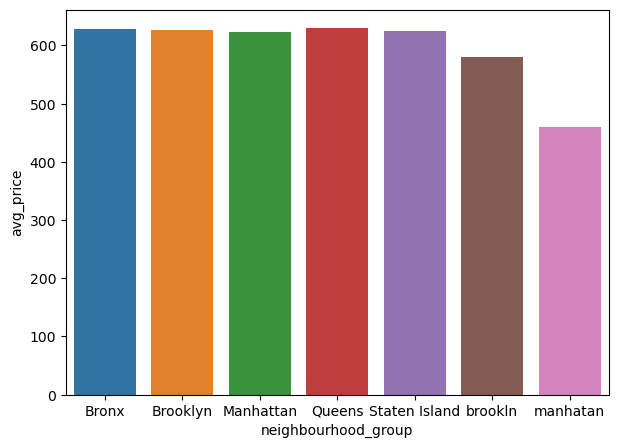

In [81]:
# Plot on neighbourhood_group and AVG price

plt.figure(figsize=(7, 5))
sns.barplot(x='neighbourhood_group', y='avg_price', data=neighbourhood_group_avgPrice)
plt.show()

---
Get the number of occurrences for each unique combination of 'neighbourhood_group' and 'room type'

Different Room type in different neighbourhood_group

In [105]:
# Get the count of occurrences for each unique combination of 'neighbourhood_group' and 'room type'
neighbourhood_group_count = airbnb_df.groupby(['neighbourhood_group', 'room type']).size().reset_index(name='count')
print(neighbourhood_group_count)

   neighbourhood_group        room type  count
0                Bronx  Entire home/apt   1022
1                Bronx     Private room   1573
2                Bronx      Shared room    117
3             Brooklyn  Entire home/apt  20575
4             Brooklyn       Hotel room      8
5             Brooklyn     Private room  20434
6             Brooklyn      Shared room    825
7            Manhattan  Entire home/apt  26473
8            Manhattan       Hotel room    100
9            Manhattan     Private room  16312
10           Manhattan      Shared room    907
11              Queens  Entire home/apt   5146
12              Queens       Hotel room      8
13              Queens     Private room   7751
14              Queens      Shared room    362
15       Staten Island  Entire home/apt    474
16       Staten Island     Private room    466
17       Staten Island      Shared room     15
18             brookln     Private room      1
19            manhatan     Private room      1


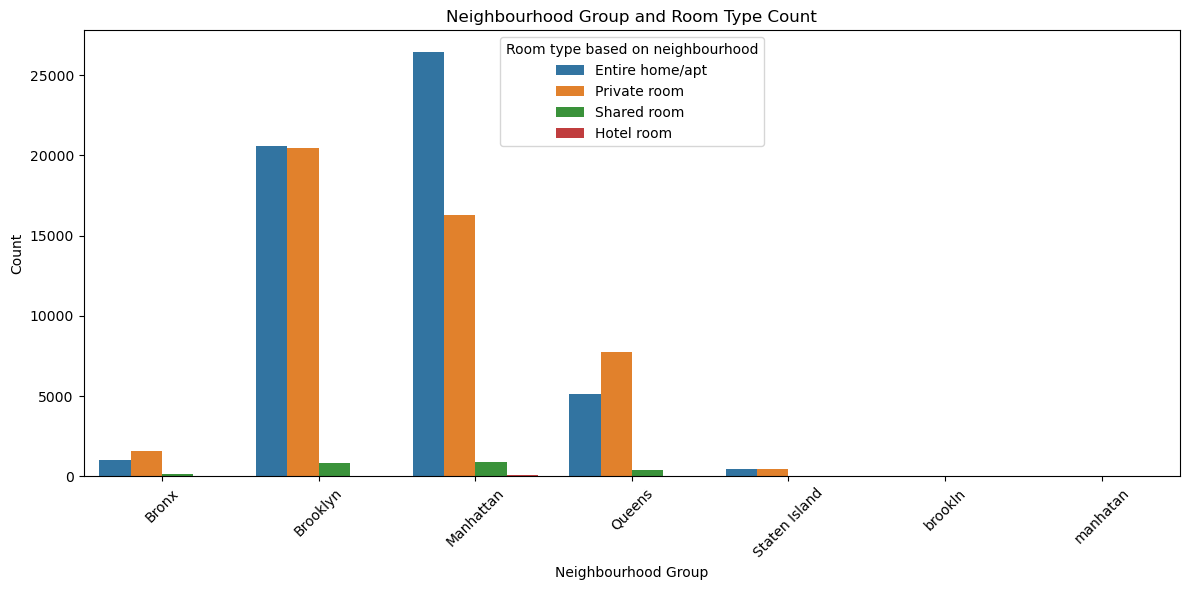

In [106]:

# Get the count of occurrences for each unique combination of 'neighbourhood_group' and 'room type'
neighbourhood_group_count = airbnb_df.groupby(['neighbourhood_group', 'room type']).size().reset_index(name='count')

# Plot using Seaborn's barplot
plt.figure(figsize=(12, 6))
sns.barplot(x="neighbourhood_group", y="count", hue="room type", data=neighbourhood_group_count)
plt.title("Neighbourhood Group and Room Type Count")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Count")
plt.legend(title="Room type based on neighbourhood")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [82]:
#Average price of AirBnb in different neighbourhood_group 
# Q1. what is the average price of a room type in bronx(neighbourhood_group )

# Group by 'neighbourhood_group' and calculate the mean price for each group
neighbourhood_group_avgPrice = airbnb_df.groupby(['neighbourhood_group', 'room type'])['price'].mean().reset_index()

# Rename the 'price' column to 'avg_price'
neighbourhood_group_avgPrice = neighbourhood_group_avgPrice.rename(columns={"price": "avg_price"})
neighbourhood_group_avgPrice

,neighbourhood_group,room type,avg_price
0,Bronx,Entire home/apt,620.232581
1,Bronx,Private room,634.710644
2,Bronx,Shared room,600.256410
3,Brooklyn,Entire home/apt,626.896406
4,Brooklyn,Hotel room,736.125000
5,Brooklyn,Private room,625.870764
6,Brooklyn,Shared room,634.317073
7,Manhattan,Entire home/apt,623.147570
8,Manhattan,Hotel room,681.870000
9,Manhattan,Private room,620.367881


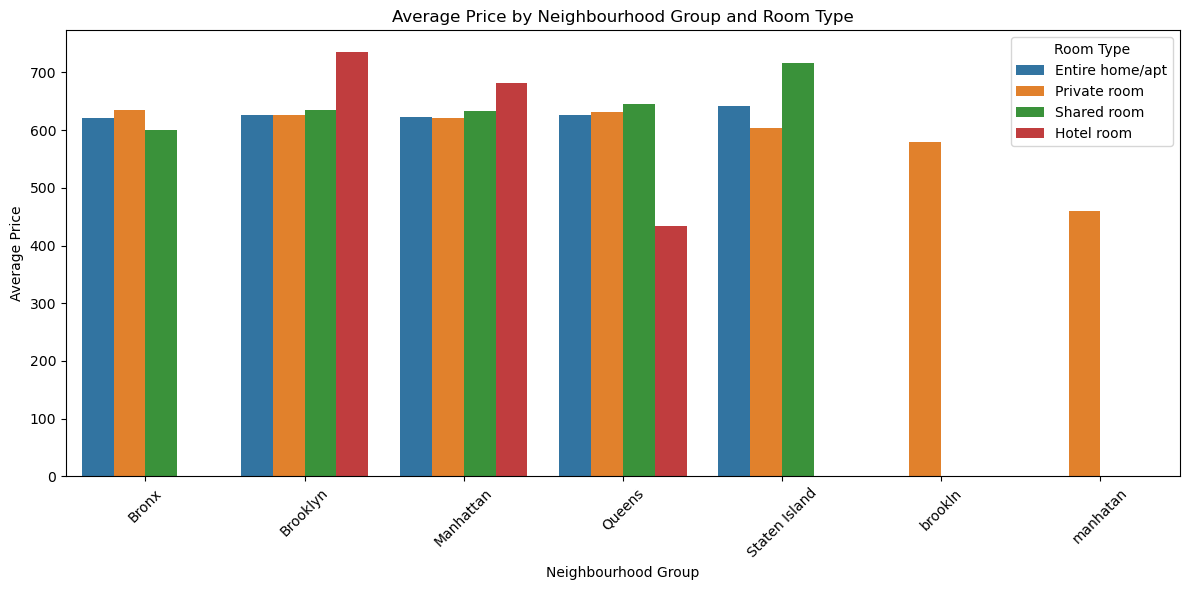

In [83]:
#Plot of different neighbourhood_group by average price

# Group by 'neighbourhood_group' and 'room type', and calculate the mean price for each group
neighbourhood_group_avgPrice = airbnb_df.groupby(['neighbourhood_group', 'room type'])['price'].mean().reset_index()

# Rename the 'price' column to 'avg_price'
neighbourhood_group_avgPrice = neighbourhood_group_avgPrice.rename(columns={"price": "avg_price"})

# Plot using Seaborn's barplot
plt.figure(figsize=(12, 6))
sns.barplot(x="neighbourhood_group", y="avg_price", hue="room type", data=neighbourhood_group_avgPrice)
plt.title("Average Price by Neighbourhood Group and Room Type")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Average Price")
plt.legend(title="Room Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---

Find the neighbourhood with the highest listings

Find the highest room type based on the neighbourhood 

In [84]:
# Neighbourhood 

# the .value_counts() method in Pandas does not include null values by default
num_different_neighbourhoods = len(airbnb_df['neighbourhood'].value_counts())
print(num_different_neighbourhoods)

224


In [85]:
airbnb_df['neighbourhood'].value_counts()

Bedford-Stuyvesant        7937
Williamsburg              7775
Harlem                    5466
Bushwick                  4982
Hell's Kitchen            3965
                          ... 
Rossville                    3
Lighthouse Hill              3
Fort Wadsworth               2
Glen Oaks                    2
Chelsea, Staten Island       1
Name: neighbourhood, Length: 224, dtype: int64

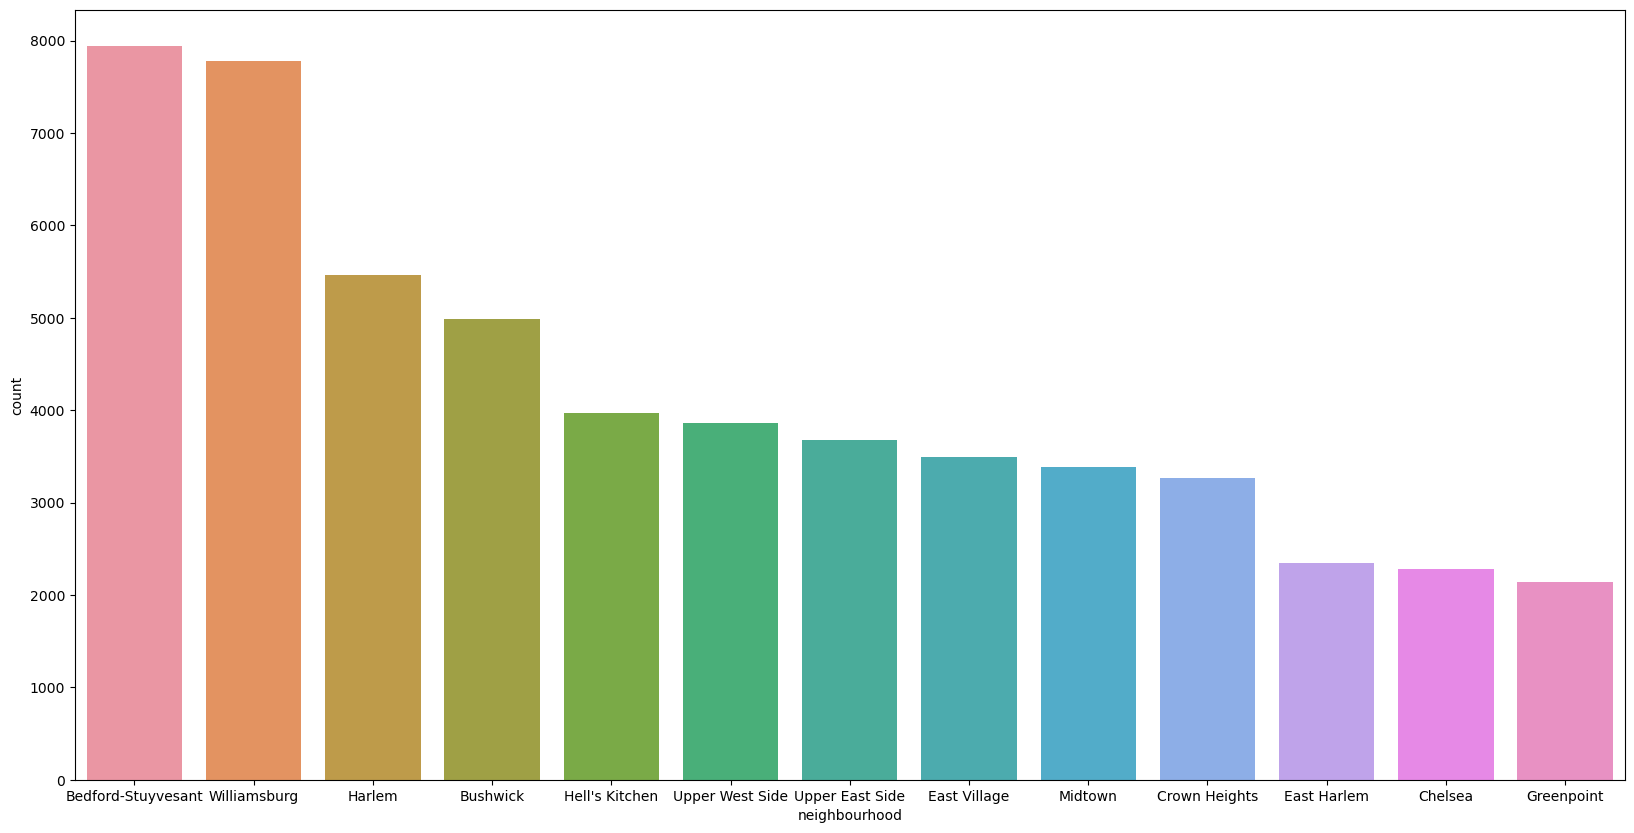

In [86]:
#visualise the top 13  neighbourhoods with the highest number of listings 

neighbourhood_count = airbnb_df['neighbourhood'].value_counts().head(13)
neighbourhood_count_df = pd.DataFrame({'neighbourhood':neighbourhood_count.index, 'count':neighbourhood_count.values})

plt.figure(figsize=(20, 10))
sns.barplot(x='neighbourhood', y='count', data=neighbourhood_count_df)
plt.show()

In [115]:
neighbourhood_count = airbnb_df.groupby(['neighbourhood', 'room type']).size().reset_index(name='count')
sort_neighbourhood_count = neighbourhood_count.sort_values(by='count', ascending=False)
sort_neighbourhood_count = sort_neighbourhood_count.head(20)
sort_neighbourhood_count

,neighbourhood,room type,count
32,Bedford-Stuyvesant,Private room,4170
559,Williamsburg,Private room,3868
557,Williamsburg,Entire home/apt,3848
31,Bedford-Stuyvesant,Entire home/apt,3576
71,Bushwick,Private room,3438
247,Harlem,Private room,3169
521,Upper East Side,Entire home/apt,2700
249,Hell's Kitchen,Entire home/apt,2384
525,Upper West Side,Entire home/apt,2380
330,Midtown,Entire home/apt,2354


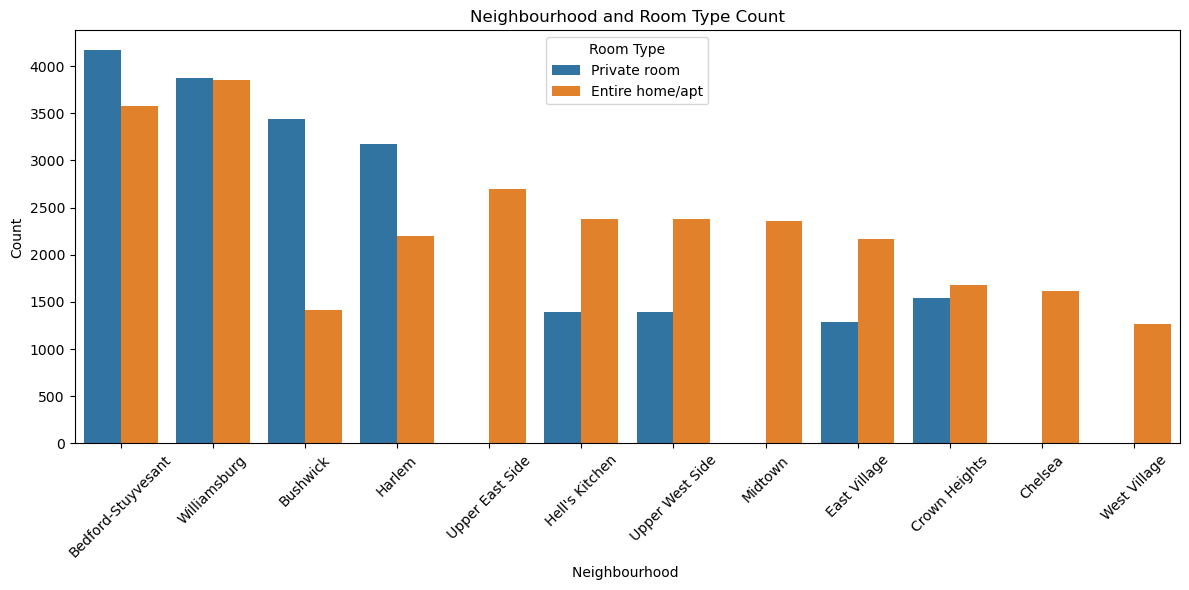

In [116]:
# Plot using Seaborn's barplot
plt.figure(figsize=(12, 6))
sns.barplot(x="neighbourhood", y="count", hue="room type", data=sort_neighbourhood_count)
plt.title("Neighbourhood and Room Type Count")
plt.xlabel("Neighbourhood ")
plt.ylabel("Count")
plt.legend(title="Room Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---
What can you learn about the listing based on the neighbourhood and reviews/rates

which neighbourhoods have the highest number of reviews 

In [88]:
neighbourhood_reviews = airbnb_df.groupby('neighbourhood')['number of reviews'].max().reset_index()
# to find the highest number of reviews you sort 'neighbourhood_reviews'
sorted_area_reviews = neighbourhood_reviews.sort_values(by='number of reviews', ascending=False)
top_neighborhoods = sorted_area_reviews.head(10)
top_neighborhoods

,neighbourhood,number of reviews
74,Financial District,1024.0
181,SoHo,1010.0
65,East Village,966.0
194,Theater District,884.0
122,Lower East Side,776.0
130,Midtown,738.0
108,Jamaica,698.0
88,Gowanus,679.0
217,Williamsburg,648.0
97,Harlem,607.0


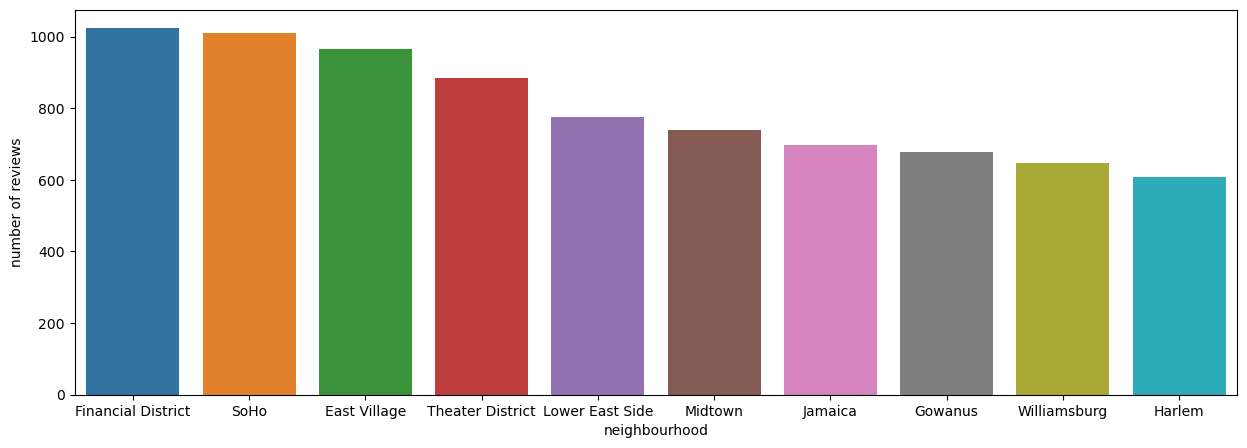

In [89]:
# which neighbourhoods have the highest number of reviews 

plt.figure(figsize=(15, 5))
sns.barplot(x='neighbourhood', y='number of reviews', data=top_neighborhoods)
plt.show()

---
Get the hosts with the highest number of listings 

In [96]:
# host_reviews = airbnb_df['host id'].value_counts()
# host_reviews
# 102057

distinct_host_count = airbnb_df['host id'].nunique()
distinct_host_count


102057

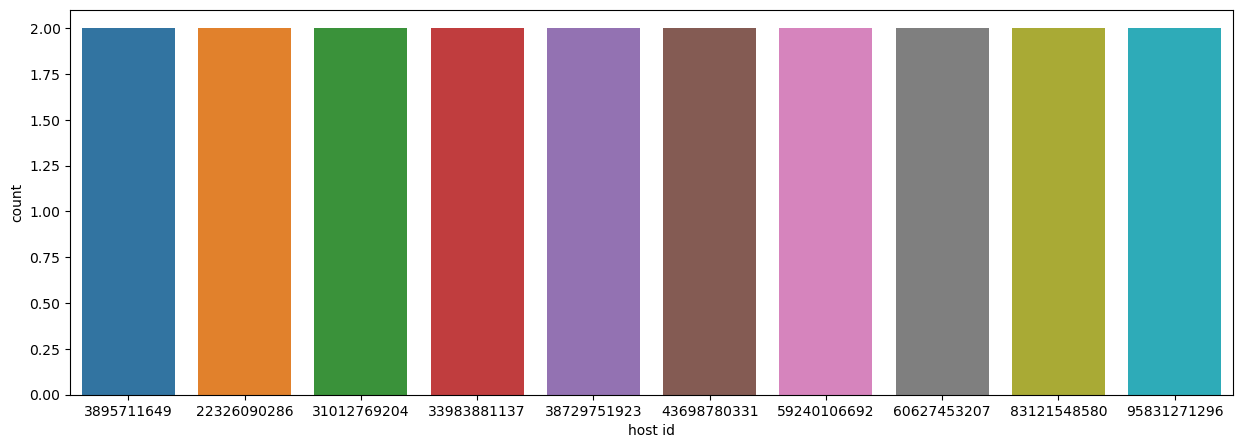

In [104]:
host_reviews = airbnb_df['host id'].value_counts().head(10)
# create a DataFrame from the 'host_reviews' Series before plotting
host_reviews = pd.DataFrame({'host id': host_reviews.index, 'count': host_reviews.values})
# host_reviews
plt.figure(figsize=(15, 5))
sns.barplot(x='host id', y='count', data=host_reviews)
plt.show()

---
What is the relationship between reviews and price 

In [119]:

price_area = airbnb_df.groupby(['price'])['number of reviews'].max().reset_index()
price_area.head(20)

,price,number of reviews
0,50.0,229.0
1,51.0,318.0
2,52.0,96.0
3,53.0,251.0
4,54.0,563.0
5,55.0,255.0
6,56.0,240.0
7,57.0,260.0
8,58.0,241.0
9,59.0,160.0


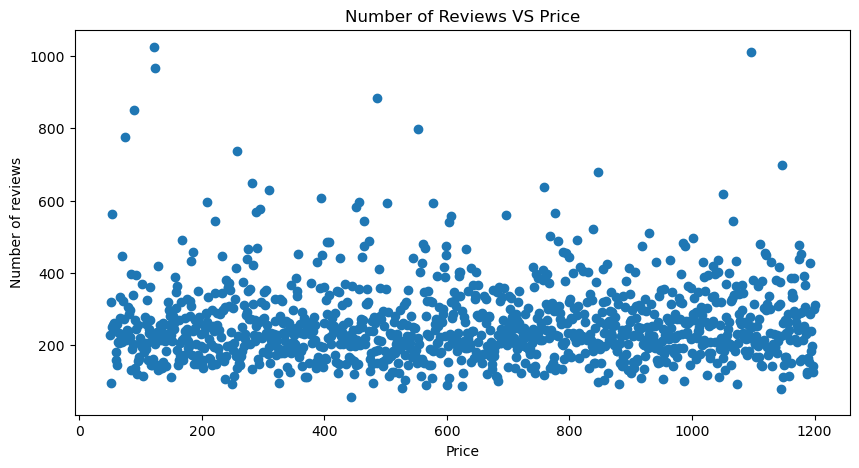

In [121]:
price_list = price_area['price']
review = price_area['number of reviews']
fig =plt.figure(figsize =(10,5))

plt.scatter(price_list, review)
plt.xlabel('Price')
plt.ylabel('Number of reviews')
plt.title('Number of Reviews VS Price')
plt.show()

---
what is the relationshipe between minimum nights and price/neighbourhood-group

How long do people stay in every neighbourhood and is it affected by price 
, which neighbourhood groups do people stay the longest 

In [123]:
minimum_nights_count = airbnb_df['minimum nights'].value_counts()
minimum_nights_count = minimum_nights_count.head(20)
minimum_nights_count

1.0     25421
2.0     23604
3.0     16113
30.0    11653
4.0      6625
5.0      6051
7.0      4039
6.0      1538
14.0     1077
10.0      932
15.0      593
29.0      569
31.0      453
20.0      440
28.0      432
21.0      256
90.0      248
8.0       246
60.0      234
12.0      171
Name: minimum nights, dtype: int64

In [141]:
minimum_nights_count = airbnb_df.groupby(['neighbourhood_group','neighbourhood'])['minimum nights'].max().reset_index()
sorted_minimum_nights_count  = minimum_nights_count.sort_values(by='minimum nights', ascending=False).head(20)
sorted_minimum_nights_count

,neighbourhood_group,neighbourhood,minimum nights
58,Brooklyn,Bushwick,5645.0
65,Brooklyn,Crown Heights,3455.0
49,Brooklyn,Bay Ridge,2645.0
105,Manhattan,Greenwich Village,1250.0
96,Manhattan,Battery Park City,1000.0
106,Manhattan,Harlem,999.0
94,Brooklyn,Williamsburg,999.0
124,Manhattan,Upper East Side,954.0
80,Brooklyn,Kensington,500.0
162,Queens,Long Island City,500.0


In [142]:

# Now, let's analyze the relationship between stay duration and price
# Group by 'neighbourhood_group', calculate the average 'minimum nights' and 'price' for each group
neighbourhood_group_stats = airbnb_df.groupby('neighbourhood_group').agg({'minimum nights': 'mean', 'price': 'mean'}).reset_index()

# Display the relationship between stay duration and price for each neighbourhood group
print(neighbourhood_group_stats)


  neighbourhood_group  minimum nights       price
0               Bronx        5.135355  627.766359
1            Brooklyn        7.300981  626.562193
2           Manhattan        9.664855  622.440227
3              Queens        6.494137  630.207647
4       Staten Island        5.912723  624.490546
5             brookln        4.000000  580.000000
6            manhatan        1.000000  460.000000


The neighbourhood group with the highest riviews 

In [144]:

neighbourhood_riviews_stats = airbnb_df.groupby('neighbourhood_group').agg({'number of reviews': 'mean', 'price': 'mean'}).reset_index()
neighbourhood_riviews_stats

,neighbourhood_group,number of reviews,price
0,Bronx,31.653392,627.766359
1,Brooklyn,28.511012,626.562193
2,Manhattan,24.120957,622.440227
3,Queens,33.706985,630.207647
4,Staten Island,35.704712,624.490546
5,brookln,167.000000,580.000000
6,manhatan,260.000000,460.000000


<Axes: xlabel='neighbourhood_group', ylabel='number of reviews'>

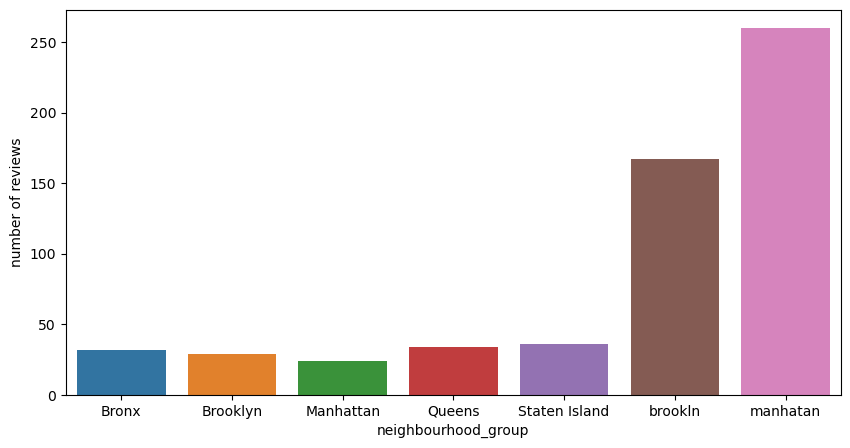

In [147]:
#plot Average reviews of AirBnb in different neighbourhood_group
plt.figure(figsize=(10, 5))
sns.barplot(x="neighbourhood_group", y="number of reviews", data=neighbourhood_riviews_stats)

---
what is the connection between Host , room type , price and number of reviews

which room type have the highest number of riviews

which Host have the highest reviews and what is their prices 

In [153]:
df_list = airbnb_df.groupby(['host id','neighbourhood_group', 'room type','price'])['number of reviews'].max().reset_index()
df_list = df_list.sort_values(by='number of reviews',ascending=False).head(20)
# df.sort_values(by='price')
df_list

,host id,neighbourhood_group,room type,price,number of reviews
55436,53558555483,Manhattan,Entire home/apt,121.0,1024.0
45741,44069230937,Manhattan,Hotel room,1097.0,1010.0
24666,23813117370,Manhattan,Private room,123.0,966.0
42541,41031720514,Manhattan,Hotel room,486.0,884.0
20758,20032806094,Manhattan,Private room,89.0,849.0
81030,78564178478,Manhattan,Private room,552.0,797.0
90055,87332142446,Manhattan,Private room,74.0,776.0
93000,90212124971,Manhattan,Hotel room,257.0,738.0
13146,12571850348,Queens,Entire home/apt,1147.0,698.0
20601,19892961158,Brooklyn,Private room,847.0,679.0


What type of rooms have the highest prices

In [169]:
price_list = airbnb_df.groupby(['host id','neighbourhood_group','number of reviews', 'room type'])['price'].max().reset_index()
price_list_sorted = df_list.sort_values(by='price',ascending=False).head(50)
# df.sort_values(by='price')
price_list_sorted

,host id,neighbourhood_group,room type,price,number of reviews
13146,12571850348,Queens,Entire home/apt,1147.0,698.0
45741,44069230937,Manhattan,Hotel room,1097.0,1010.0
40520,39066649621,Manhattan,Private room,1051.0,618.0
20601,19892961158,Brooklyn,Private room,847.0,679.0
29295,28338699286,Brooklyn,Private room,758.0,638.0
81030,78564178478,Manhattan,Private room,552.0,797.0
65962,63946915448,Manhattan,Private room,502.0,594.0
42541,41031720514,Manhattan,Hotel room,486.0,884.0
15303,14713491370,Manhattan,Hotel room,457.0,597.0
52820,51011773515,Manhattan,Private room,394.0,607.0


---
Traffic Areas based on Minimum Nights Booked

In [174]:
night_traffic = airbnb_df.groupby(['host id','neighbourhood_group','room type','price'])['minimum nights'].max().reset_index()
night_traffic = night_traffic.sort_values(by='minimum nights', ascending=False)
# night_traffic

<Axes: xlabel='room type', ylabel='minimum nights'>

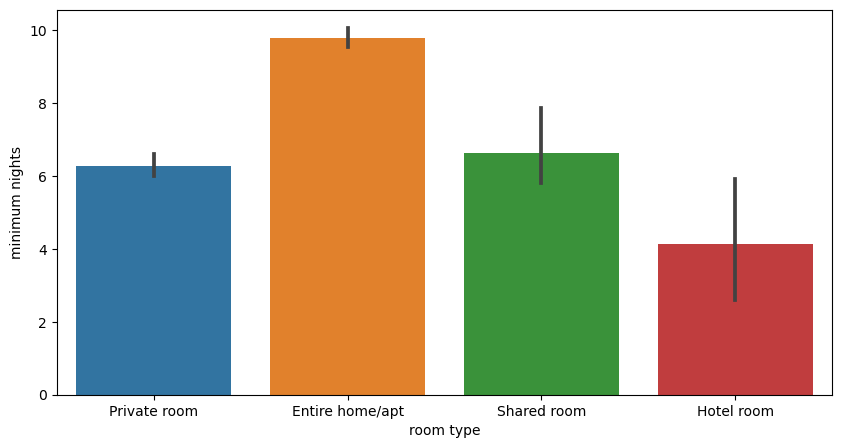

In [175]:
plt.figure(figsize=(10, 5))
sns.barplot(x="room type", y="minimum nights", data=night_traffic)

---
Correlation

/var/folders/ll/tr3z9w091y55mt3_qxw9k4gr0000gn/T/ipykernel_80615/1141140962.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = airbnb_df.corr( method = "kendall")


Index(['id', 'NAME', 'host id', 'host name', 'neighbourhood_group',
       'neighbourhood', 'lat', 'long', 'room type', 'price', 'service fee',
       'minimum nights', 'number of reviews', 'last review',
       'reviews per month', 'review rate number',
       'calculated host listings count', 'availability 365'],
      dtype='object')


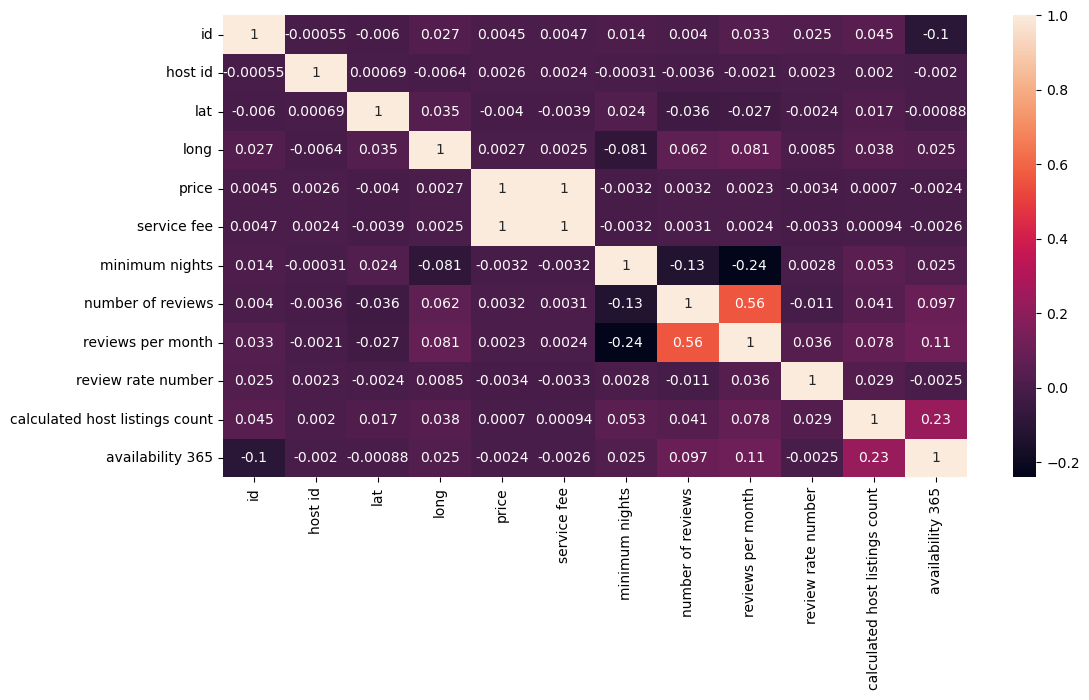

In [184]:
# The scipy library is a dependency of the pandas library for calculating correlations
from scipy import stats

corr = airbnb_df.corr( method = "kendall")
fig = plt.figure(figsize=(12,6))
sns.heatmap(corr, annot = True)
plt.show

print(airbnb_df.columns)

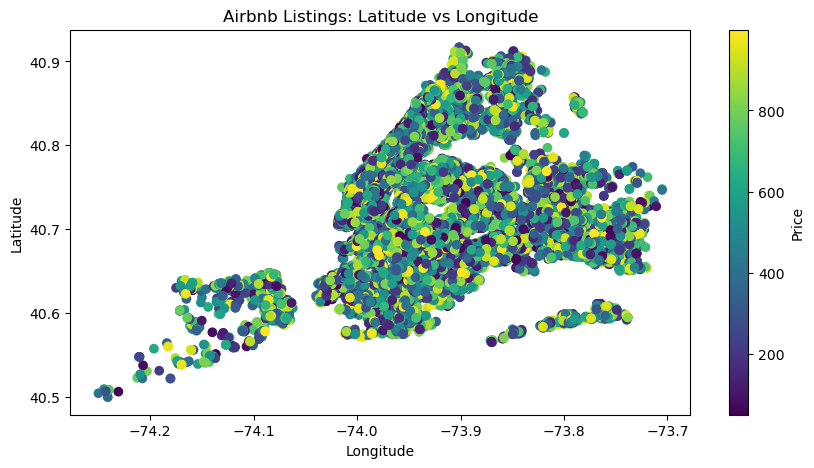

In [186]:
# Filter data for prices below 1000
data_plot_trim = airbnb_df[airbnb_df['price'] < 1000]

# Create a scatter plot
plt.figure(figsize=(10, 5))
scatter = plt.scatter(x='long', y='lat', c='price', cmap='viridis', data=data_plot_trim)

# Add colorbar
plt.colorbar(scatter, label='Price')

# Set plot title and labels
plt.title('Airbnb Listings: Latitude vs Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()

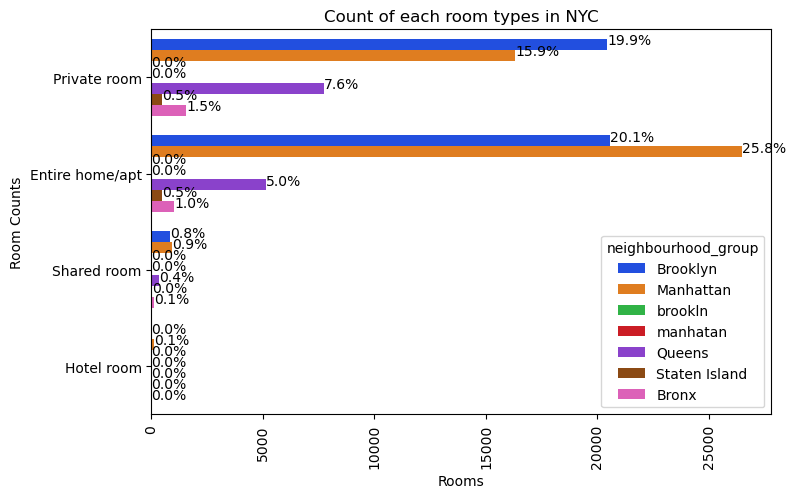

In [187]:
plt.rcParams['figure.figsize'] = (8, 5)
ax= sns.countplot(y='room type',hue='neighbourhood_group',data=airbnb_df,palette='bright')

total = len(airbnb_df['room type'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.title('Count of each room types in NYC')
plt.xlabel('Rooms')
plt.xticks(rotation=90)
plt.ylabel('Room Counts')

plt.show()